## Clustering

## 데이터 불러오기

In [2]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris(as_frame=True)

In [3]:
df=iris['data']

## 데이터 정규화

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)

## 클러스터링 학습하기

In [14]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3) # kmeans 클러스터링 객체 생성
kmeans.fit(df_norm) # 학습

KMeans(n_clusters=3)

## 중점 확인하기

In [15]:
kmeans.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [16]:
## 중점과 소속된 점들사이 평균거리 확인
kmeans.inertia_

139.82049635974977

In [17]:
# 분류된 점 확인
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

## 예측

In [19]:
kmeans.predict([[0,0,0,0]])

array([2], dtype=int32)

## K를 바꾸어가며 확인

In [20]:
cn=[]
measure=[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    cn.append(i)
    measure.append(kmeans.inertia_)

In [21]:
measure

[599.9999999999999,
 222.36170496502297,
 139.82049635974974,
 114.30449485021937,
 90.83337188704894,
 80.03687480296509,
 71.04780988893488,
 63.028916938300505,
 55.13339521526774]

<BarContainer object of 9 artists>

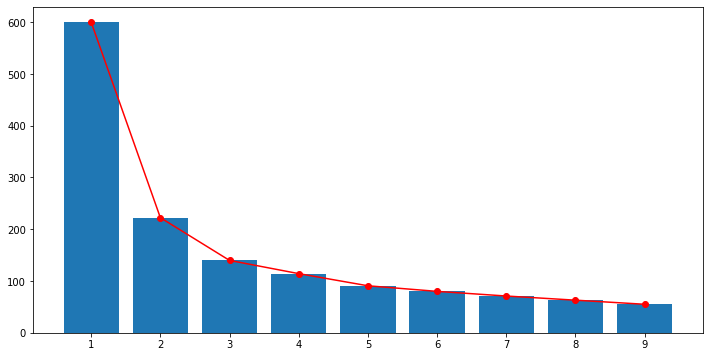

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(cn,measure,'ro-')
plt.bar(cn,measure,tick_label=cn)
